In [1]:
!pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [2]:
import os
import time
import datetime
from google.colab import drive

import pandas as pd
import seaborn as sns
import numpy as np
import random

import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader, random_split, RandomSampler, SequentialSampler
torch.manual_seed(42)

from transformers import GPT2LMHeadModel,  GPT2Tokenizer, GPT2Config, GPT2LMHeadModel
from transformers import AdamW, get_linear_schedule_with_warmup
from datasets import load_dataset

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
!nvidia-smi

Sun May 12 20:25:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
dataset = load_dataset("merve/poetry")
df = pd.DataFrame(dataset['train']['content'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/573 [00:00<?, ? examples/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['author', 'content', 'poem name', 'age', 'type'],
        num_rows: 573
    })
})

In [6]:
df

,0
0,Let the bird of loudest lay\r\nOn the sole Ara...
1,"Sir Charles into my chamber coming in,\r\nWhen..."
2,"Our vice runs beyond all that old men saw,\r\n..."
3,"Lo I the man, whose Muse whilome did maske,\r\..."
4,"Long have I longd to see my love againe,\r\nSt..."
...,...
568,"With the man I love who loves me not,\r\nI wal..."
569,"Hart Crane, ""Voyages I, II, III, IV, V, VI"" fr..."
570,"When you are old and grey and full of sleep,\r..."
571,"Give me hunger,\r\nO you gods that sit and giv..."


In [7]:
content = df.copy()
content

,0
0,Let the bird of loudest lay\r\nOn the sole Ara...
1,"Sir Charles into my chamber coming in,\r\nWhen..."
2,"Our vice runs beyond all that old men saw,\r\n..."
3,"Lo I the man, whose Muse whilome did maske,\r\..."
4,"Long have I longd to see my love againe,\r\nSt..."
...,...
568,"With the man I love who loves me not,\r\nI wal..."
569,"Hart Crane, ""Voyages I, II, III, IV, V, VI"" fr..."
570,"When you are old and grey and full of sleep,\r..."
571,"Give me hunger,\r\nO you gods that sit and giv..."


In [8]:
for c, cc in enumerate(content[0]):
  print(cc)
  if c == 3:
    break

Let the bird of loudest lay
On the sole Arabian tree
Herald sad and trumpet be,
To whose sound chaste wings obey.

But thou shrieking harbinger,
Foul precurrer of the fiend,
Augur of the fever's end,
To this troop come thou not near.

From this session interdict
Every fowl of tyrant wing,
Save the eagle, feather'd king;
Keep the obsequy so strict.

Let the priest in surplice white,
That defunctive music can,
Be the death-divining swan,
Lest the requiem lack his right.

And thou treble-dated crow,
That thy sable gender mak'st
With the breath thou giv'st and tak'st,
'Mongst our mourners shalt thou go.

Here the anthem doth commence:
Love and constancy is dead;
Phoenix and the Turtle fled
In a mutual flame from hence.

So they lov'd, as love in twain
Had the essence but in one;
Two distincts, division none:
Number there in love was slain.

Hearts remote, yet not asunder;
Distance and no space was seen
'Twixt this Turtle and his queen:
But in them it were a wonder.

So between them love di

<ipython-input-9-55877191f971>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(doc_lengths)


<Axes: ylabel='Density'>

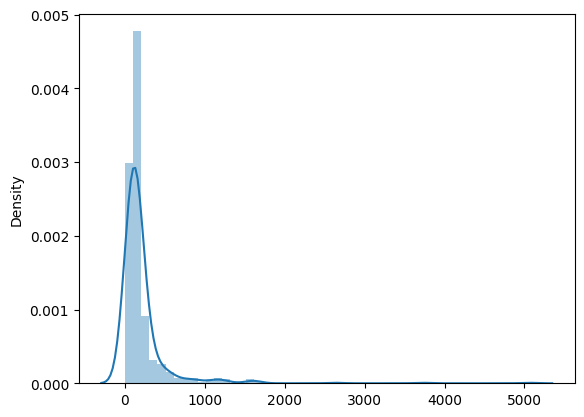

In [9]:
doc_lengths = []

for c in content[0]:

    # get rough token count distribution
    tokens = nltk.word_tokenize(c)

    doc_lengths.append(len(tokens))

doc_lengths = np.array(doc_lengths)

sns.distplot(doc_lengths)

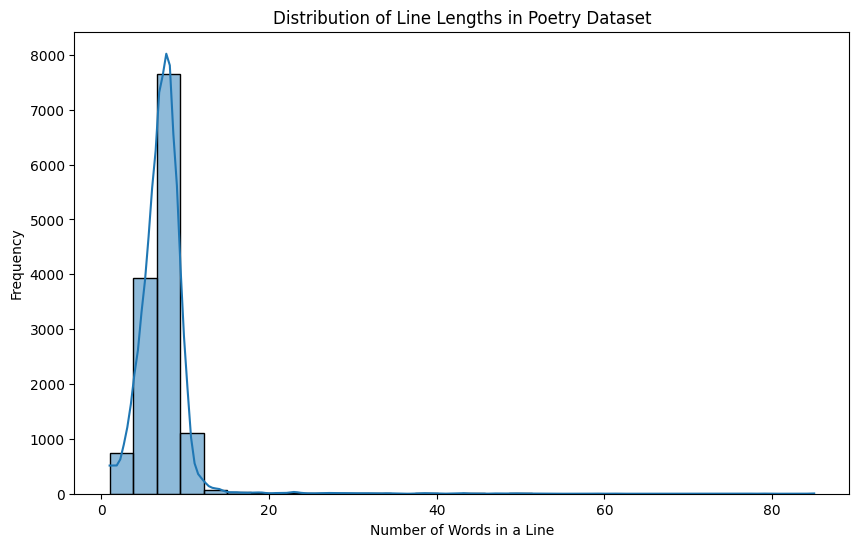

In [10]:
line_lengths = []

# Iterate through each row of the DataFrame and calculate line lengths
for poem_content in content[0]:
    # Split the poem content into lines
    lines = poem_content.split('\n')
    # Calculate the length of each line and append it to the list
    line_lengths.extend([len(line.split()) for line in lines if line.strip() != ''])

# Plotting the distribution of line lengths
plt.figure(figsize=(10, 6))
sns.histplot(line_lengths, bins=30, kde=True)
plt.title('Distribution of Line Lengths in Poetry Dataset')
plt.xlabel('Number of Words in a Line')
plt.ylabel('Frequency')
plt.show()


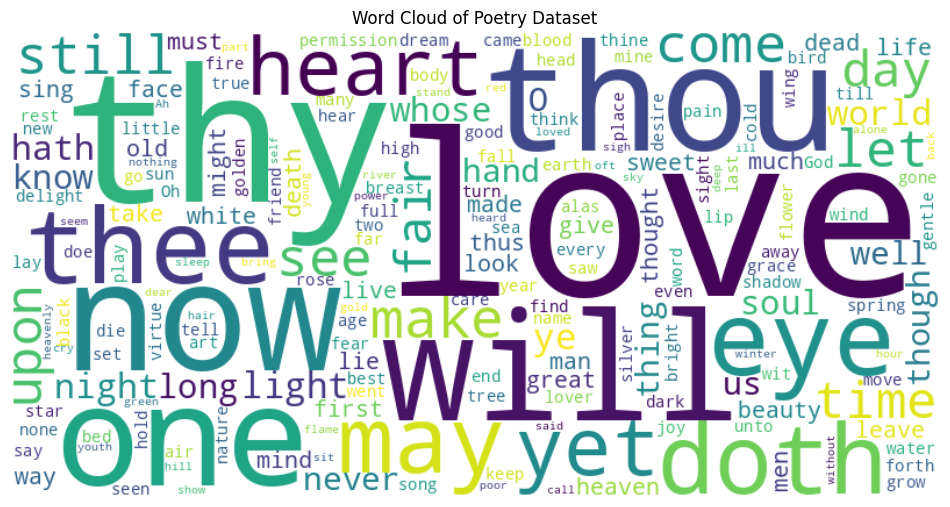

In [11]:
from wordcloud import WordCloud, STOPWORDS

all_poems_text = " ".join(content[0])

stopwords = set(STOPWORDS)

# Generate word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(all_poems_text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud of Poetry Dataset')
plt.show()


In [12]:
# the max token length
len(doc_lengths[doc_lengths > 768])/len(doc_lengths)

0.041884816753926704

In [13]:
np.average(doc_lengths)

205.13612565445027

In [14]:
# Load the GPT tokenizer.
tokenizer = GPT2Tokenizer.from_pretrained('gpt2', bos_token='<|startoftext|>', eos_token='<|endoftext|>', pad_token='<|pad|>') #gpt2-medium

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [15]:
print("The max model length is {} for this model, although the actual embedding size for GPT small is 768".format(tokenizer.model_max_length))
print("The beginning of sequence token {} token has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.bos_token_id), tokenizer.bos_token_id))
print("The end of sequence token {} has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.eos_token_id), tokenizer.eos_token_id))
print("The padding token {} has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.pad_token_id), tokenizer.pad_token_id))

The max model length is 1024 for this model, although the actual embedding size for GPT small is 768
The beginning of sequence token <|startoftext|> token has the id 50257
The end of sequence token <|endoftext|> has the id 50256
The padding token <|pad|> has the id 50258


In [16]:
batch_size = 2

In [17]:
class GPT2Dataset(Dataset):

  def __init__(self, txt_list, tokenizer, gpt2_type="gpt2", max_length=768):

    self.tokenizer = tokenizer
    self.input_ids = []
    self.attn_masks = []

    for txt in txt_list:

      encodings_dict = tokenizer('<|startoftext|>'+ txt + '<|endoftext|>', truncation=True, max_length=max_length, padding="max_length")

      self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
      self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))

  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self, idx):
    return self.input_ids[idx], self.attn_masks[idx]

In [18]:
dataset = GPT2Dataset(content[0], tokenizer, max_length=768)

# Split into training and validation sets
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

  515 training samples
   58 validation samples


In [19]:
# Create the DataLoaders for our training and validation datasets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [20]:
# I'm not really doing anything with the config buheret
configuration = GPT2Config.from_pretrained('gpt2', output_hidden_states=False)

# instantiate the model
model = GPT2LMHeadModel.from_pretrained("gpt2", config=configuration)

# this step is necessary because I've added some tokens (bos_token, etc) to the embeddings
# otherwise the tokenizer and model tensors won't match up
model.resize_token_embeddings(len(tokenizer))

# Tell pytorch to run this model on the GPU.
device = torch.device("cuda")
model.cuda()

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [21]:
# some parameters I cooked up that work reasonably well

epochs = 5
learning_rate = 5e-4
warmup_steps = 1e2
epsilon = 1e-8

# this produces sample output every 100 steps
sample_every = 100

In [22]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
optimizer = AdamW(model.parameters(),
                  lr = learning_rate,
                  eps = epsilon
                )

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [23]:
# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
# This changes the learning rate as the training loop progresses
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = warmup_steps,
                                            num_training_steps = total_steps)

In [24]:
def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

In [25]:
total_t0 = time.time()

training_stats = []

model = model.to(device)

for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0

    model.train()

    for step, batch in enumerate(train_dataloader):

        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        model.zero_grad()

        outputs = model(  b_input_ids,
                          labels=b_labels,
                          attention_mask = b_masks,
                          token_type_ids=None
                        )

        loss = outputs[0]

        batch_loss = loss.item()
        total_train_loss += batch_loss

        # Get sample every x batches.
        if step % sample_every == 0 and not step == 0:

            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}. Loss: {:>5,}.   Elapsed: {:}.'.format(step, len(train_dataloader), batch_loss, elapsed))

            model.eval()

            sample_outputs = model.generate(
                                    bos_token_id=random.randint(1,30000),
                                    do_sample=True,
                                    top_k=50,
                                    max_length = 200,
                                    top_p=0.95,
                                    num_return_sequences=1
                                )
            for i, sample_output in enumerate(sample_outputs):
                  print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

            model.train()

        loss.backward()

        optimizer.step()

        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        with torch.no_grad():

            outputs  = model(b_input_ids,
#                            token_type_ids=None,
                             attention_mask = b_masks,
                            labels=b_labels)

            loss = outputs[0]

        batch_loss = loss.item()
        total_eval_loss += batch_loss

    avg_val_loss = total_eval_loss / len(validation_dataloader)

    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")
print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 5 ========
Training...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   100  of    258. Loss: 2.024359703063965.   Elapsed: 0:00:49.
0:  bipartisan" way.

That they put forth the most earnest, most, most-committed effort into the work of the great deed of the good deed of a good man.

And they say the very best of every man.

And he must give the best of his life.
 very well.

The very well:

Gentlemen like thee:

I am very well.

And she is well.


Love's love:

Gentlemen like thee:

You have been well.

You have learned to be true.

 and you must learn to love:

.

If you love the heart, or do love the soul.

You cannot escape the heart.

But, if you are not, your heart will be a little heart:
Gentlemen like them:

You have been well:



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   200  of    258. Loss: 2.302875518798828.   Elapsed: 0:01:40.
0:  increasingFamilies, the rich and the poor alike.
In my eyes, my hair grows thin and fast.
The sun lifts my head low, the flowers grow strong.
The stars rise out from thin cloud, and the ground moves.
The skies, my cheeks are full and fair,
The stars fade, and I see the sun rising.
But all the earth dies, my friends,
I love the sun so much,
For it is so rare, and therefore so pleasant.
So I say, my hair grows thin and fast.
The sun lifts my head low and makes my cheeks shine.
The stars rise out from thin cloud, and I see the sun rising.
As I laugh at these bright stars,
 I hear songs from deep sleep.
I sing a poem about the golden age of youth,
The old age the twilight time.

  Average training loss: 2.03
  Training epoch took: 0:02:11

Running Validation...
  Validation Loss: 1.11
  Validation took: 0:00:05

======== Epoch 2 / 5 ========
Training...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   100  of    258. Loss: 1.083682894706726.   Elapsed: 0:00:50.
0: dayIt was my old world, my old world,
And I had never seen thee.




























































































The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   200  of    258. Loss: 2.534701108932495.   Elapsed: 0:01:43.
0:  HangThe music was music.
A prayer for the dead,
For those whom I have seen,
For those whose souls shall be ours,
For those whose souls shall be ours,
The rest of the earth shall know,
Those whose souls shall be ours.

  Average training loss: 1.10
  Training epoch took: 0:02:13

Running Validation...
  Validation Loss: 1.08
  Validation took: 0:00:05

======== Epoch 3 / 5 ========
Training...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   100  of    258. Loss: 0.9734264016151428.   Elapsed: 0:00:50.
0:  foodsNow I hear thee say,
My lover, sweetest words that everwere,
O my sweet loves, give them,
And sweet words that love be,
My love, all your lips do,
All sweet hearts do in my heart;
Now my lover, thy sweet tunes shall play.

O, sweet lovers, thou mine most holy name,
But now, my love's not sung,
It is my lips' sweet voice.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   200  of    258. Loss: 0.8163098692893982.   Elapsed: 0:01:41.
0:  trailKenneth Fearing, The Kent State University Press, 2005. Copyright  1968 by Kenneth Fearing. Reprinted by permission of Kent State University Press. Reprinted by permission of the Kent State University Press, http://kent.usuc.edu/fs and Kent State University Press.

  Average training loss: 0.99
  Training epoch took: 0:02:10

Running Validation...
  Validation Loss: 1.08
  Validation took: 0:00:05

======== Epoch 4 / 5 ========
Training...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   100  of    258. Loss: 1.3470046520233154.   Elapsed: 0:00:50.
0: intendThis is the world in which it began,
Whose first fruits, thy flowers, thy leaves,
And with them all your flowers are gathered;
Wherewith I began to be a flower,
And with thee it never lost its glory;
And with thee, with thee, it never lost possession.
But since it was no flower,
I sought thee, I have found thee;
And since it is not a flower, I have no wish to lose,
But you have a new fortune,
And now I see thee with that fortune;
For since I am one man, you shall see my face,
And there will thy treasure fill the sky.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   200  of    258. Loss: 1.1569832563400269.   Elapsed: 0:01:42.
0:  surroundThou hast no tongue, but thy breast art
And thou that is a toy will have
And shalt end with thee.

Yet thy beauty bears it too,
Your beauty to show, and thy beauty to hide.

But thy great beauty in thy breast,
Thou art art the world's darling,
Your tongue hath no tongue, but thy heart it,
Thou art the world's darling, thy tongue to hide
And thy heart to hide.

Yet thy great beauty bears it too,
Thou art the world's darling, thy tongue to hide
And thy heart to hide.

  Average training loss: 0.88
  Training epoch took: 0:02:12

Running Validation...
  Validation Loss: 1.09
  Validation took: 0:00:05

======== Epoch 5 / 5 ========
Training...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   100  of    258. Loss: 0.8741940259933472.   Elapsed: 0:00:50.
0:  reflexThe spring
    Is the spring
    When the earth and the air


spring from the spring
       Are balanced in equivocations.
spring from the spring
         Spring

spring from the spring

spring from the spring

spring from the spring
       The earth and the air

spring from the spring
        Are balanced in equivocations.
spring from the spring

spring from the spring

spring from the spring

spring from the spring
       Are balanced in equivocations.
spring from the spring


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   200  of    258. Loss: 0.38340839743614197.   Elapsed: 0:01:42.
0:  displayNow that I am old, thou mayst not be old,
For love, that loves not his prey,
For loves is not his prey,
And since thou hast such, thou mayst still be
In love.

  Average training loss: 0.80
  Training epoch took: 0:02:11

Running Validation...
  Validation Loss: 1.11
  Validation took: 0:00:05

Training complete!
Total training took 0:11:20 (h:mm:ss)


In [26]:
# Display floats with two decimal places.
pd.set_option('display.precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Training Time,Validation Time
epoch,,,,
1,2.03,1.11,0:02:11,0:00:05
2,1.10,1.08,0:02:13,0:00:05
3,0.99,1.08,0:02:10,0:00:05
4,0.88,1.09,0:02:12,0:00:05
5,0.80,1.11,0:02:11,0:00:05


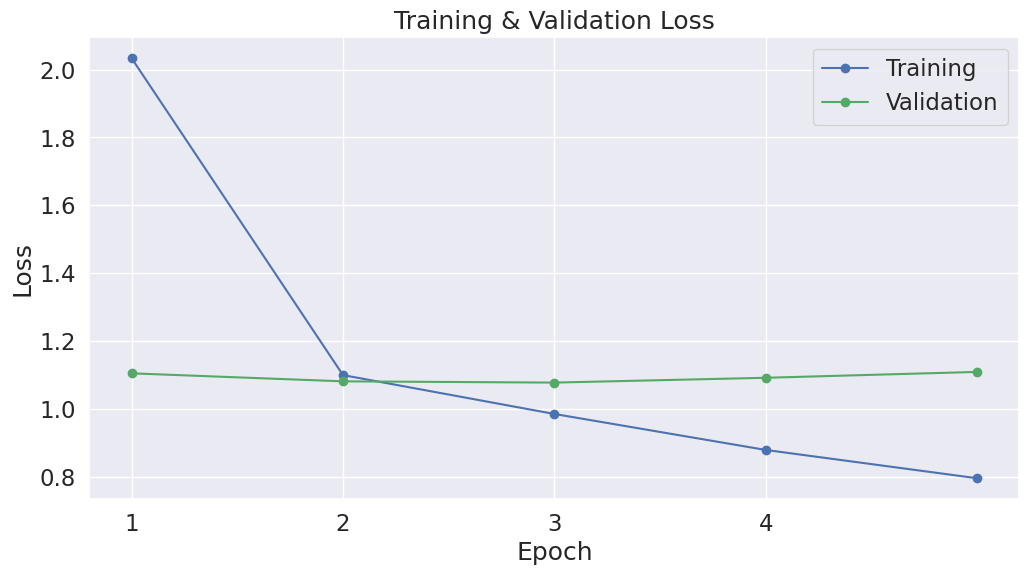

In [27]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [28]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The GPT-2 model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:2]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[2:14]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-2:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The GPT-2 model has 148 different named parameters.

==== Embedding Layer ====

transformer.wte.weight                                  (50259, 768)
transformer.wpe.weight                                   (1024, 768)

==== First Transformer ====

transformer.h.0.ln_1.weight                                   (768,)
transformer.h.0.ln_1.bias                                     (768,)
transformer.h.0.attn.c_attn.weight                       (768, 2304)
transformer.h.0.attn.c_attn.bias                             (2304,)
transformer.h.0.attn.c_proj.weight                        (768, 768)
transformer.h.0.attn.c_proj.bias                              (768,)
transformer.h.0.ln_2.weight                                   (768,)
transformer.h.0.ln_2.bias                                     (768,)
transformer.h.0.mlp.c_fc.weight                          (768, 3072)
transformer.h.0.mlp.c_fc.bias                                (3072,)
transformer.h.0.mlp.c_proj.weight                        (3072

In [29]:
# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to ./model_save/


('./model_save/tokenizer_config.json',
 './model_save/special_tokens_map.json',
 './model_save/vocab.json',
 './model_save/merges.txt',
 './model_save/added_tokens.json')

In [30]:
!ls -l --block-size=K ./model_save/

total 487560K
-rw-r--r-- 1 root root      1K May 12 20:36 added_tokens.json
-rw-r--r-- 1 root root      1K May 12 20:36 config.json
-rw-r--r-- 1 root root      1K May 12 20:36 generation_config.json
-rw-r--r-- 1 root root    446K May 12 20:36 merges.txt
-rw-r--r-- 1 root root 486114K May 12 20:36 model.safetensors
-rw-r--r-- 1 root root      1K May 12 20:36 special_tokens_map.json
-rw-r--r-- 1 root root      1K May 12 20:36 tokenizer_config.json
-rw-r--r-- 1 root root    976K May 12 20:36 vocab.json


In [31]:
!ls -l --block-size=M ./model_save/model.safetensors

-rw-r--r-- 1 root root 475M May 12 20:36 ./model_save/model.safetensors


In [32]:
model.eval()

prompt = "<|startoftext|>"

generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
generated = generated.to(device)

print(generated)

sample_outputs = model.generate(
                                generated,
                                #bos_token_id=random.randint(1,30000),
                                do_sample=True,
                                top_k=50,
                                max_length = 300,
                                top_p=0.95,
                                num_return_sequences=3
                                )

for i, sample_output in enumerate(sample_outputs):
  print("{}: {}\n\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


tensor([[50257]], device='cuda:0')
0: A hand that raises his wand,
The wand is like a glove,
A lamp like the wind;
But when in the window, at noon
I see him shining,
The other hand raises his wand:
And when my husband prays
To make me come home,
I keep the wand in my hand:
And when he is done, I put his head in the dust;
He lies here with me still,
And the wind beats on him, till I drown.

The day is now past, when I came,
And all is old and empty.

And this is what the elders call me,
A bride, and this is what the elders call me.

And since the elders say that it is better for me to be alone,
I have got hold of this wand.


1: I went to the door
And the keeper of the hall gave me a handkerchief
To hold and record the evening of my stay
As all the world heard the stories of the great house-fires.
In that hall the master kept a secret,
And to my own astonishment I saw
His black marble steps branching along the crystal street
And slowly raising their ominous alarms.
But now the old maste

In [33]:
!zip -r gpt_2_model_4_25.zip model_save/

  adding: model_save/ (stored 0%)
  adding: model_save/special_tokens_map.json (deflated 78%)
  adding: model_save/model.safetensors (deflated 7%)
  adding: model_save/config.json (deflated 51%)
  adding: model_save/vocab.json (deflated 68%)
  adding: model_save/merges.txt (deflated 53%)
  adding: model_save/added_tokens.json (deflated 20%)
  adding: model_save/generation_config.json (deflated 24%)
  adding: model_save/tokenizer_config.json (deflated 70%)
